<a href="https://colab.research.google.com/github/AatishKumar649/NLp-Word2Vec-/blob/main/word2Vec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import gensim

In [2]:
from gensim.models import word2vec, keyedvectors

In [9]:
import gensim.downloader as api
wv = api.load('word2vec-google-news-300')
# google-news is a pretrained model of google and 300 represents 300 dimensions
vec_king = Wv['king']

In [6]:
vec_king
# This represents the 300 dimentions or vectors that make the word king

array([ 1.25976562e-01,  2.97851562e-02,  8.60595703e-03,  1.39648438e-01,
       -2.56347656e-02, -3.61328125e-02,  1.11816406e-01, -1.98242188e-01,
        5.12695312e-02,  3.63281250e-01, -2.42187500e-01, -3.02734375e-01,
       -1.77734375e-01, -2.49023438e-02, -1.67968750e-01, -1.69921875e-01,
        3.46679688e-02,  5.21850586e-03,  4.63867188e-02,  1.28906250e-01,
        1.36718750e-01,  1.12792969e-01,  5.95703125e-02,  1.36718750e-01,
        1.01074219e-01, -1.76757812e-01, -2.51953125e-01,  5.98144531e-02,
        3.41796875e-01, -3.11279297e-02,  1.04492188e-01,  6.17675781e-02,
        1.24511719e-01,  4.00390625e-01, -3.22265625e-01,  8.39843750e-02,
        3.90625000e-02,  5.85937500e-03,  7.03125000e-02,  1.72851562e-01,
        1.38671875e-01, -2.31445312e-01,  2.83203125e-01,  1.42578125e-01,
        3.41796875e-01, -2.39257812e-02, -1.09863281e-01,  3.32031250e-02,
       -5.46875000e-02,  1.53198242e-02, -1.62109375e-01,  1.58203125e-01,
       -2.59765625e-01,  

In [10]:
wv['man']
# This will tell the 300 dimensions of manin vector form

array([ 0.32617188,  0.13085938,  0.03466797, -0.08300781,  0.08984375,
       -0.04125977, -0.19824219,  0.00689697,  0.14355469,  0.0019455 ,
        0.02880859, -0.25      , -0.08398438, -0.15136719, -0.10205078,
        0.04077148, -0.09765625,  0.05932617,  0.02978516, -0.10058594,
       -0.13085938,  0.001297  ,  0.02612305, -0.27148438,  0.06396484,
       -0.19140625, -0.078125  ,  0.25976562,  0.375     , -0.04541016,
        0.16210938,  0.13671875, -0.06396484, -0.02062988, -0.09667969,
        0.25390625,  0.24804688, -0.12695312,  0.07177734,  0.3203125 ,
        0.03149414, -0.03857422,  0.21191406, -0.00811768,  0.22265625,
       -0.13476562, -0.07617188,  0.01049805, -0.05175781,  0.03808594,
       -0.13378906,  0.125     ,  0.0559082 , -0.18261719,  0.08154297,
       -0.08447266, -0.07763672, -0.04345703,  0.08105469, -0.01092529,
        0.17480469,  0.30664062, -0.04321289, -0.01416016,  0.09082031,
       -0.00927734, -0.03442383, -0.11523438,  0.12451172, -0.02

In [11]:
wv.most_similar('man')
# This tells the semantic relation between other words that is how much percentage one word is related to other word

[('woman', 0.7664012908935547),
 ('boy', 0.6824871301651001),
 ('teenager', 0.6586930155754089),
 ('teenage_girl', 0.6147903203964233),
 ('girl', 0.5921714305877686),
 ('suspected_purse_snatcher', 0.571636438369751),
 ('robber', 0.5585119128227234),
 ('Robbery_suspect', 0.5584409832954407),
 ('teen_ager', 0.5549196600914001),
 ('men', 0.5489763021469116)]

In [12]:
wv.similarity('man','king')
# used to check similarity between two words

0.22942673

# **Creating WordCloud**

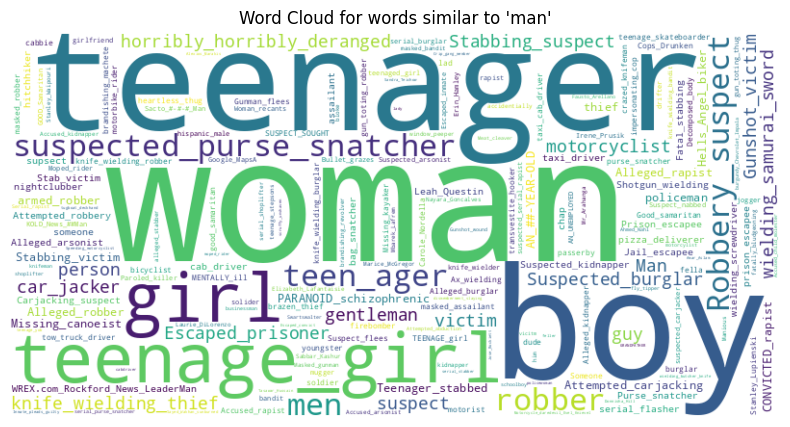

In [14]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Choose a target word for finding similar words
target_word = "man"

# Get the top 10 most similar words
similar_words = wv.most_similar(target_word, topn=1000)

# Convert to a dictionary with words as keys and similarity scores as values
word_dict = {word: score for word, score in similar_words}

# Generate the Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_dict)

# Plot the Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title(f"Word Cloud for words similar to '{target_word}'")
plt.show()


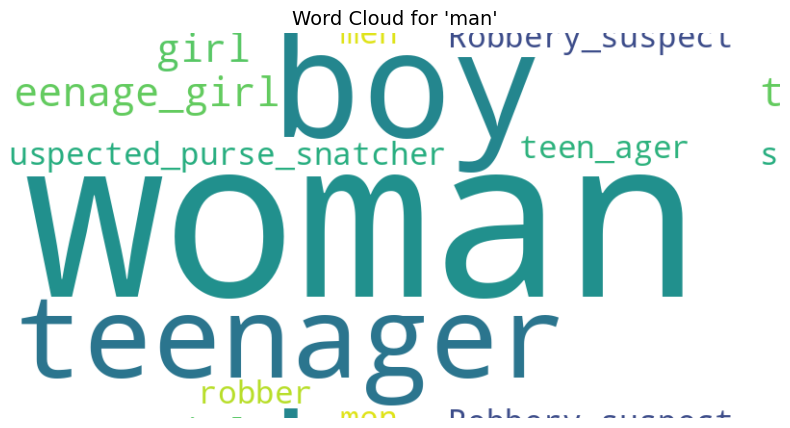

In [22]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from wordcloud import WordCloud
import numpy as np
from IPython.display import HTML

# List of target words for animation
target_words = ["man", "woman", "leader", "power", "success", "technology", "education", "future"]

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 5))

def generate_wordcloud(target_word):
    """Generate a word cloud from the most similar words to the target word."""
    similar_words = wv.most_similar(target_word, topn=10)
    word_dict = {word: score for word, score in similar_words}

    return WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_dict)

def update(frame):
    """Update function for animation"""
    ax.clear()

    # Pick a target word in sequence
    target_word = target_words[frame % len(target_words)]

    # Generate new word cloud
    wordcloud = generate_wordcloud(target_word)

    # Convert word cloud to numpy array
    wordcloud_array = wordcloud.to_array()

    # Add some random movement
    x_shift = np.random.randint(-50, 50)  # Adjust range for movement
    y_shift = np.random.randint(-50, 50)

    # Shift the word cloud array (using roll to wrap around)
    shifted_array = np.roll(wordcloud_array, (y_shift, x_shift), axis=(0, 1))

    # Display Word Cloud
    ax.imshow(shifted_array, interpolation="bilinear")
    ax.set_title(f"Word Cloud for '{target_word}'", fontsize=14)
    ax.axis("off")

# Create animation
ani = animation.FuncAnimation(fig, update, frames=len(target_words), interval=2000, repeat=True)

# Ensure that animation is displayed in Colab using HTML
HTML(ani.to_jshtml())
# or
# HTML(ani.to_html5_video())